### 국민연금 가입자 조회

In [57]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.1f}'.format)
pd.set_option('display.max_columns', None)

font_name = fm.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
plt.rcParams['font.family'] = font_name

DATA_DIR = '.'

In [58]:
df = pd.read_csv(os.path.join(DATA_DIR, 'national-pension.csv'), encoding='cp949')
df.head(3)

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,법정동주소광역시시군구코드,법정동주소광역시시군구읍면동코드,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2024-07,(유)삼송,116810,1,06776,서울특별시 서초구 양재동,서울특별시 서초구 마방로6길,1165010200,1165065200,11,650,102,1,,NaN,1988-01-01,NaN,NaN,207,77649440,4,11
1,2024-07,(주)장성,214815,1,13511,경기도 성남시 분당구 야탑동,경기도 성남시 분당구 판교로,4113510700,4113561000,41,135,107,1,172902,그 외 기타 분류 안된 섬유제품 제조업,1988-01-01,NaN,NaN,3,1193660,0,0
2,2024-07,특수법인 총포 화약안전기술협회,118820,1,04162,서울특별시 마포구 용강동,서울특별시 마포구 마포대로1길,1144010500,1144059000,11,440,105,1,742201,기타 기술 시험 검사 및 분석업,1988-01-01,NaN,NaN,24,8802940,0,1


In [59]:
df.columns = [
    '자료생성년월', '사업장명', '사업자등록번호', '가입상태', '우편번호', '사업장지번상세주소', '주소', '고객법정동주소코드', '고객행정동주소코드',
    '시도코드', '시군구코드', '읍면동코드', '사업장형태구분코드 1 법인 2 개인', '업종코드', '업종코드명', '적용일자', '재등록일자', '탈퇴일자', 
    '가입자수', '금액', '신규', '상실'
]
df = df.drop(['자료생성년월','우편번호','사업장지번상세주소','고객법정동주소코드', '고객행정동주소코드','사업장형태구분코드 1 법인 2 개인','적용일자', '재등록일자'], axis=1)
df.head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,(유)삼송,116810,1,서울특별시 서초구 마방로6길,11,650,102,,NaN,NaN,207,77649440,4,11
1,(주)장성,214815,1,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,NaN,3,1193660,0,0
2,특수법인 총포 화약안전기술협회,118820,1,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,NaN,24,8802940,0,1
3,서울명지초등학교,111820,1,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,NaN,31,6607760,0,0
4,삼양건설산업(주),229810,1,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,NaN,41,17082880,0,23


#### 사업장명 클린징

In [60]:
df.loc[df['사업장명'].str.contains('\(주\)')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
1,(주)장성,214815,1,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,NaN,3,1193660,0,0
4,삼양건설산업(주),229810,1,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,NaN,41,17082880,0,23
5,(주)한국경제신문,110810,1,서울특별시 중구 청파로,11,140,171,221200,잡지 및 정기 간행물 발행업,NaN,478,229106680,4,6
6,(주) 매일경제신문사,203810,1,서울특별시 중구 퇴계로,11,140,137,222102,스크린 인쇄업,NaN,724,261948920,10,11
7,대성출판(주),108811,1,서울특별시 동작구 노량진로,11,590,101,809005,일반 교과학원,NaN,41,10330060,5,4


##### 삼양건설산업(주) 에서 (주) 라는 글자 제거하는 경우

In [61]:
# Regular Expression(정규화) 모듈 사용
import re

pattern1 = '(\([^)]+\))'
re.sub(pattern1, '', '삼양건설산업(주)')

'삼양건설산업'

##### 사업장명에서 [] 특수문자를 포함하는 경우 []안쪽 글자까지 제거하는 경우

In [62]:
df.loc[df['사업장명'].str.contains('\[')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
107870,에스티테크[주],606817,1,부산광역시 사하구 감천항로419번길,26,380,107,291502,기타 물품 취급장비 제조업,NaN,10,4066240,0,0
151835,게스트하우스 [특별자활],206826,1,서울특별시 성동구 가람길,11,200,118,999999,BIZ_NO미존재사업장,NaN,9,1569040,1,0
154321,[주)한빛관리 은행대우 3차1단지/ 생활지원센타],212813,1,경기도 시흥시 은행로,41,390,106,702003,비주거용 부동산 관리업,NaN,3,811600,0,0
158881,비전트레이닝센터[자활사업],206826,1,서울특별시 성동구 자동차시장길,11,200,122,999999,BIZ_NO미존재사업장,NaN,14,1008600,0,4
175767,바이오코리아[BIOKOREA],317826,1,충청북도 청주시 흥덕구 오송읍 오송생명2로,43,113,250,999999,BIZ_NO미존재사업장,NaN,3,688580,0,0


##### (예시) 에스티테크[주]에서 [주]를 삭제 하고 싶은 경우

In [63]:
pattern2 = '(\[[^)]+\])'
re.sub(pattern2, '', '에스티테크[주]')

'에스티테크'

In [64]:
df.loc[df['사업장명'].str.contains('\/')].head(10)

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
867,(주)동양/건재부문,101853,1,서울특별시 영등포구 국제금융로2길,11,560,110,269401,시멘트 제조업,NaN,311,151941640,1,3
1687,재우교통/주,205812,1,서울특별시 마포구 가양대로,11,440,127,602201,택시 운송업,NaN,3,823400,0,0
4718,(주)한영파트너스FH/월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,983400,0,0
17379,의료법인해정의료재단/더좋은병원,502821,1,대구광역시 수성구 명덕로,27,260,105,851101,요양병원,NaN,189,45925460,10,4
21245,안산시청(의료급여사례관리/통합돌봄과),134830,1,경기도 안산시 단원구 화랑로,41,273,101,701201,비주거용 건물 임대업(점포 자기땅),NaN,5,1511800,0,0
22507,(주)영일에이치오엠/이동그린빌명품,506811,1,경상북도 포항시 남구 대이로,47,111,117,749300,건축물 일반 청소업,NaN,3,834280,0,0
23685,주/대명부품,204817,1,서울특별시 동대문구 한천로,11,230,105,503003,자동차 중고 부품 및 내장품 판매업,NaN,3,1142980,0,1
24301,열린노무법인/부산사무소,607851,1,부산광역시 부산진구 동평로,26,230,101,741109,기타 법무관련 서비스업,NaN,3,785680,0,0
24460,전용부품판매/주,204817,1,서울특별시 동대문구 전농로4길,11,230,105,503003,자동차 중고 부품 및 내장품 판매업,NaN,4,1227060,0,0
26124,민현건설(주)/본사,507810,1,대전광역시 서구 대덕대로,30,170,113,452102,유리 및 창호 공사업,NaN,4,558340,0,0


##### 그 밖의 모든 특수문자는 제거합니다. (제거한 특수문자에는 공백을 삽입합니다)

In [65]:
pattern3 = '[^A-Za-z0-9가-힣]'
result = re.sub(pattern3, ' ', '*^%$^의료법인%해정^&*****%!@의료재단/더/좋은/병원')
result = re.sub(' +', ' ', result)
result

' 의료법인 해정 의료재단 더 좋은 병원'

In [66]:
# 검증코드 (변경전)
df.loc[[143146, 1284, 24109, 23092, 548425]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
143146,(주)금산,606811,1,부산광역시 강서구 녹산산업중로,26,440,109,371000,금속류 원료 재생업,NaN,22,6130200,0,1
1284,대한건축사협회,214820,1,서울특별시 서초구 효령로,11,650,108,701201,비주거용 건물 임대업(점포 자기땅),NaN,90,34439500,3,2
24109,(주)아텍콘트롤,121814,1,경기도 부천시 원미구 부천로198번길,41,192,103,331300,산업 처리공정 제어장비 제조업,NaN,11,4862840,0,0
23092,한국주택시설관리(주) 광장현대3단지관리소,213812,1,서울특별시 광진구 광나루로,11,215,104,702003,비주거용 부동산 관리업,NaN,3,696780,0,1
548425,간빠이 천호점,203853,1,서울특별시 강동구 천호대로157길,11,740,109,552205,생맥주 전문점,NaN,3,909000,0,0


위의 제공된 힌트를 참고하여 사업장명 컬럼에 대하여 다음 조건의 클린징을 적용해 주세요

1. (주) 와 같은 문자열은 ()안에 문자를 포함하여 일괄 제거합니다.
2. [주식회사]와 같이 [] 안에 문자열 포함하여 일괄 제거합니다.
3. 숫자, 한글, 영어를 제외한 특수문자는 공백으로 대체 합니다. 만약 공백이 1개 이상이 들어간 경우는 1개로 대체합니다.

In [67]:
# 코드를 입력해 주세요
def preprocessing(x):
    x = re.sub(pattern1, '', x)
    x = re.sub(pattern2, '', x)
    x = re.sub(pattern3, ' ', x)
    x = re.sub(' +', ' ', x)
    return x

df['사업장명'] = df['사업장명'].apply(preprocessing)

In [68]:
# 검증코드
df.loc[[143146, 1284, 24109, 23092, 548425]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
143146,금산,606811,1,부산광역시 강서구 녹산산업중로,26,440,109,371000,금속류 원료 재생업,NaN,22,6130200,0,1
1284,대한건축사협회,214820,1,서울특별시 서초구 효령로,11,650,108,701201,비주거용 건물 임대업(점포 자기땅),NaN,90,34439500,3,2
24109,아텍콘트롤,121814,1,경기도 부천시 원미구 부천로198번길,41,192,103,331300,산업 처리공정 제어장비 제조업,NaN,11,4862840,0,0
23092,한국주택시설관리 광장현대3단지관리소,213812,1,서울특별시 광진구 광나루로,11,215,104,702003,비주거용 부동산 관리업,NaN,3,696780,0,1
548425,간빠이 천호점,203853,1,서울특별시 강동구 천호대로157길,11,740,109,552205,생맥주 전문점,NaN,3,909000,0,0


#### 분석        
2023년도에 탈퇴한 기업의 월별 탈퇴 수를 bar그래프로 출력합니다.

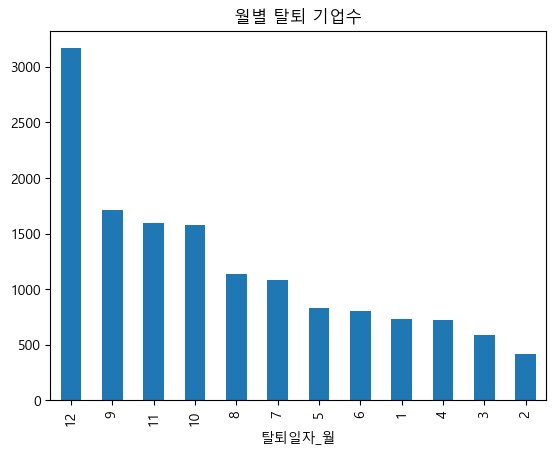

In [69]:
# 코드를 입력해 주세요
df['탈퇴일자_연도'] =  pd.to_datetime(df['탈퇴일자']).dt.year
df['탈퇴일자_월'] =  pd.to_datetime(df['탈퇴일자']).dt.month
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2023), '탈퇴일자_월'].astype('int').value_counts().plot(kind='bar')
plt.title('월별 탈퇴 기업수')
plt.show()

2022년도에 탈퇴한 기업을 대상으로 시도별 탈퇴한 기업의 숫자를 bar 그래프로 출력하세요

In [70]:
df['주소'].str.split(' ').str[0]

0         서울특별시
1           경기도
2         서울특별시
3         서울특별시
4         서울특별시
          ...  
565099     경상북도
565100    대전광역시
565101         
565102     경상북도
565103         
Name: 주소, Length: 565104, dtype: object

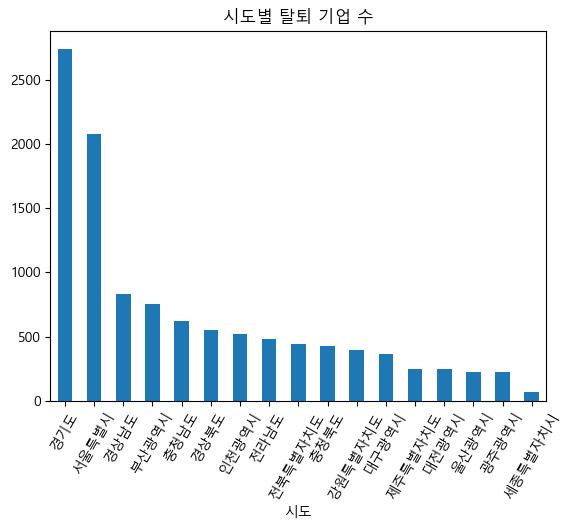

In [71]:
# 코드를 입력해 주세요
df['시도'] = df['주소'].str.split(' ').str[0] # 시도가 0번째 인덱스임
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2023) & (df['시도'].apply(lambda x: len(x.strip())) > 0), '시도'].value_counts().plot(kind='bar')
plt.title('시도별 탈퇴 기업 수')
plt.xticks(rotation=60)
plt.show()

탈퇴한 기업을 대상으로 상반기 / 하반기별 기업의 탈퇴 수를 비교합니다.

* 비교대상은 2017년 ~ 2022년을 기준으로 산정합니다.

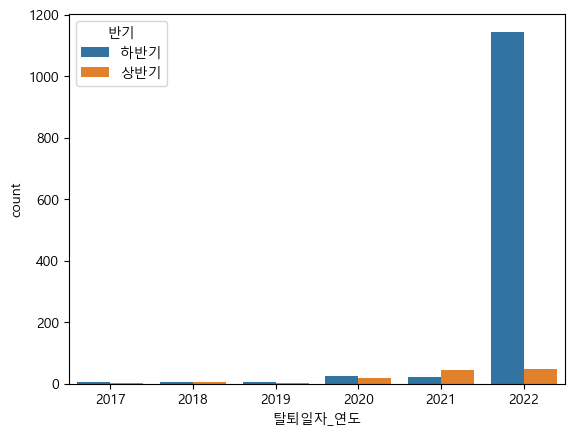

In [72]:
# 코드를 입력해 주세요
cond1 = (df['가입상태'] == 2) & (df['탈퇴일자_연도'] >= 2017) & (df['탈퇴일자_연도'] <= 2022)
tmp = df.loc[cond1].copy()
tmp['반기'] = np.where(tmp['탈퇴일자_월'] <= 6, '상반기', '하반기')
tmp['탈퇴일자_연도'] = tmp['탈퇴일자_연도'].astype('int')
sns.countplot(x='탈퇴일자_연도', hue='반기', data=tmp)
df = df.drop(['탈퇴일자_연도', '탈퇴일자_월','시도'], axis=1)
plt.show()

* 가입상태가 2인 데이터는 삭제 합니다.
* 가입상태, 탈퇴일자 컬럼을 제거하세요.

In [73]:
df = df.loc[df['가입상태'] == 1].drop(['가입상태', '탈퇴일자'], axis=1).reset_index(drop=True)
print(f'shape: {df.shape[0]} 행')
df.head()

shape: 518593 행


,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실
0,삼송,116810,서울특별시 서초구 마방로6길,11,650,102,,NaN,207,77649440,4,11
1,장성,214815,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,3,1193660,0,0
2,특수법인 총포 화약안전기술협회,118820,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,24,8802940,0,1
3,서울명지초등학교,111820,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,31,6607760,0,0
4,삼양건설산업,229810,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,41,17082880,0,23


#### 핵심 데이터 칼럼 추출        
* 수도권(서울, 경기도) 소재의 기업을 대상으로 합니다.
* 가입자수를 기준으로 내림차순 정렬하여 bar 그래프를 출력합니다.
* 출력되는 사업장명은 상위 20개만 출력합니다.

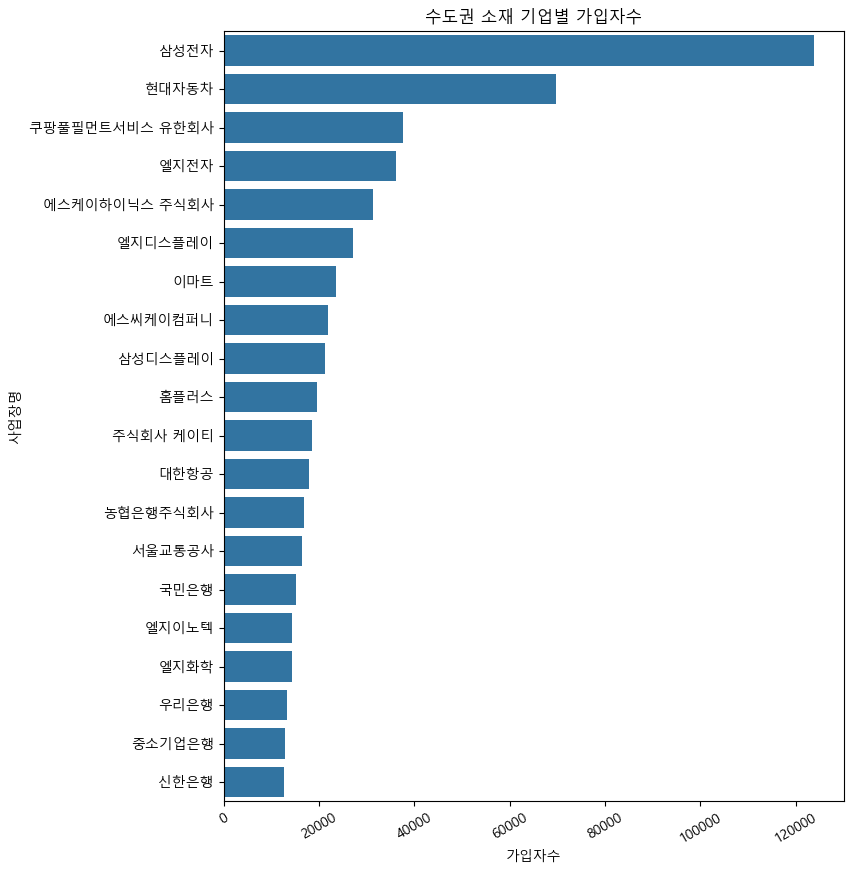

In [74]:
plt.figure(figsize=(8, 10))
tmp = df.loc[df['시도코드'].isin([11, 41]), ['사업장명', '가입자수']].sort_values('가입자수', ascending=False).head(20).reset_index()
sns.barplot(y='사업장명', x='가입자수', data=tmp)
plt.xticks(rotation=30)
plt.title('수도권 소재 기업별 가입자수')
plt.show()

#### 국민연금 납부액으로 기업별 평균 연봉 추정        
국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다.

하지만 이를 절반으로 나누어 4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 상한선과 하한선이 설정되어 있어 실제보다 과소계산될 수 있습니다

[수식]

* 인당금액 = 금액 / 가입자수
* 월급여추정 = 인당금액 / 9% * 100%
* 연간급여추정 = 임직원 평균 월급 * 12개월
* 금액을 가입자수로 나눈 금액을 산출하여 인당금액을 먼저 산출합니다.
* 월급여추정은 인당금액 / 9% * 100% 한 값입니다.
* 월급여추정을 x12한 값을 연간급여추정에 대입합니다.
* 가입자수 기준 1000명을 초과하는 기업(중견기업)을 필터링 합니다.
* 출력시 사업장명, 가입자수, 월급여추정, 연간급여추정 컬럼만 출력합니다.
* 연간급여추정와 가입자수를 기준으로 내림차순하여 상위 10개 기업을 출력합니다.

In [75]:
df.head()

,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실
0,삼송,116810,서울특별시 서초구 마방로6길,11,650,102,,NaN,207,77649440,4,11
1,장성,214815,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,3,1193660,0,0
2,특수법인 총포 화약안전기술협회,118820,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,24,8802940,0,1
3,서울명지초등학교,111820,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,31,6607760,0,0
4,삼양건설산업,229810,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,41,17082880,0,23


In [76]:
df['인당금액'] = df['금액'] / df['가입자수']
df['월급여추정'] =  df['인당금액'] / 9 * 100
df['연간급여추정'] = df['월급여추정'] * 12

cond = (df['가입자수'] > 1000)
df.sort_values(['연간급여추정', '가입자수'], ascending=False).loc[cond, ['사업장명', '가입자수', '월급여추정', '연간급여추정']].head(10)

,사업장명,가입자수,월급여추정,연간급여추정
3477,주식회사 현대케피코,1675,6160983.9,73931806.6
6191,기아 영업본부,2258,6159913.6,73918963.1
95005,현대제철포항1공장,1529,6159520.7,73914248.1
6098,기아 정비본부,1221,6154871.8,73858461.4
212007,부산항만산업협회 화물고정업,1073,6154572.0,73854864.2
86381,현대제철주식회사,1581,6151057.8,73812694.1
187302,삼성디스플레이,21345,6139944.0,73679328.1
141493,현대위아,2878,6125539.2,73506470.2
251684,삼성물산건설부문 정규직,4605,6125145.1,73501741.6
149199,에이치디현대오일뱅크 주식회사,1323,6116740.7,73400888.9


#### 업종별 가입자수 순유입 산정       
* 순유입은 신규 - 상실 로 정의합니다.
* 업종코드명별 순유입의 합산을 구한 후 상위 20개 업종코드명에 대하여 bar 그래프로 출력합니다.
* 순유입 기준으로 내림차순 정렬합니다.

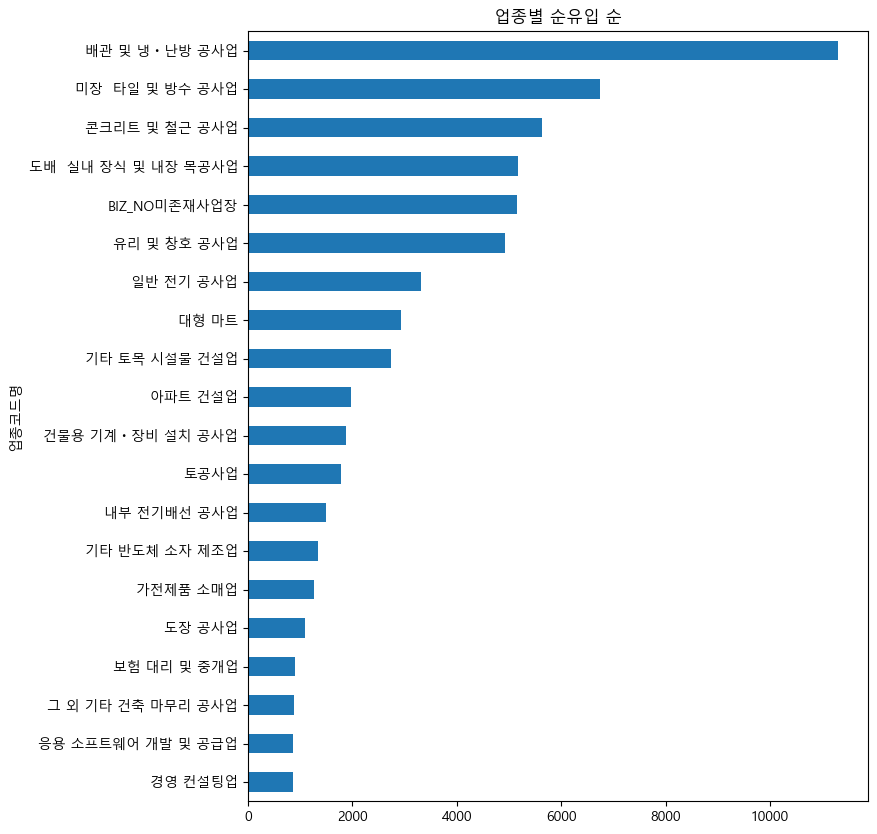

In [77]:
plt.figure(figsize=(8, 10))
df['순유입'] = df['신규'] - df['상실']
df.groupby('업종코드명')['순유입'].sum().sort_values(ascending=False).head(20).sort_values().plot(kind='barh')
plt.title('업종별 순유입 순')
plt.show()

#### 다음의 기능을 하는 함수를 완성하세요       
* 사업자명을 검색한 후 결과를 return하는 함수를 완성합니다.
* 함수명은 find_company 입니다.
* 매개변수 contains: True인 경우: string의 contains를 사용하여 포함하는 모든 회사를 찾습니다. False인 경우: 정확히 일치하는 사업장명만 찾습니다.
* def find_company(company_name, contains)
* ['사업장명', '월급여추정', '연간급여추정', '업종코드'] 정보를 보여주는 DataFrame을 return 합니다.

In [78]:
df.head()

,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실,인당금액,월급여추정,연간급여추정,순유입
0,삼송,116810,서울특별시 서초구 마방로6길,11,650,102,,NaN,207,77649440,4,11,375118.1,4167978.5,50015742.4,-7
1,장성,214815,경기도 성남시 분당구 판교로,41,135,107,172902,그 외 기타 분류 안된 섬유제품 제조업,3,1193660,0,0,397886.7,4420963.0,53051555.6,0
2,특수법인 총포 화약안전기술협회,118820,서울특별시 마포구 마포대로1길,11,440,105,742201,기타 기술 시험 검사 및 분석업,24,8802940,0,1,366789.2,4075435.2,48905222.2,-1
3,서울명지초등학교,111820,서울특별시 서대문구 명지2길,11,410,118,999999,BIZ_NO미존재사업장,31,6607760,0,0,213153.5,2368372.8,28420473.1,0
4,삼양건설산업,229810,서울특별시 서초구 동산로,11,650,102,451101,아파트 건설업,41,17082880,0,23,416655.6,4629506.8,55554081.3,-23


In [79]:
def find_company(company_name, contains):
    if contains:
        return df.loc[df['사업장명'].str.contains(company_name), ['사업장명', '월급여추정', '연간급여추정', '업종코드', '가입자수']]\
              .sort_values('가입자수', ascending=False)
    else:
        return df.loc[df['사업장명']==company_name, ['사업장명', '월급여추정', '연간급여추정', '업종코드', '가입자수']]\
              .sort_values('가입자수', ascending=False)

In [80]:
# 검증코드
find_company('에스케이텔레콤', True)

,사업장명,월급여추정,연간급여추정,업종코드,가입자수
2994,에스케이텔레콤,5924811.0,71097732.3,642001,5568
354319,에스케이텔레콤씨에스티원,4059075.1,48708900.9,924101,74
407783,에스케이텔레콤 주 상용 4단계 운항통신시설 구매설치사업,3652130.7,43825568.6,642001,17
440843,에스케이텔레콤 상용 경북 사업장 형태선LTE R,5990977.8,71891733.3,642001,5
127914,주식회사 에스케이텔레콤봉화대리점,3759925.9,45119111.1,523323,3
234416,에스케이텔레콤 철원동송대리점,3571629.6,42859555.6,515060,3
486586,에스케이텔레콤 주 용역 2022 2023년 성남시 지능형교통체계 구축사업,6170000.0,74040000.0,642001,3
511804,에스케이텔레콤 주 상용 인천공항 경비보안시스템 통신망 개선사업,3430000.0,41160000.0,642001,3


In [81]:
# 검증코드
find_company('에스케이텔레콤', False)

,사업장명,월급여추정,연간급여추정,업종코드,가입자수
2994,에스케이텔레콤,5924811.0,71097732.3,642001,5568


* 사업장명을 입력하면 사업장명과 정확히 일치하는 회사를 찾습니다. (find_company 함수 사용)
* 함수명은 compare_company 입니다.
* 매개변수명은 company_name 으로 지정하세요
* def compare_company(company_name)

기능

* find_company로 부터 return 된 DataFrame의 업종코드와 동일한 회사를 모두 찾습니다.
* 동일한 회사의 월급여추정, 연간급여추정에 대한 ['mean', 'count', 'min', 'max']를 산출합니다.

return 되는 DataFrame은 다음과 같이 구성합니다.

* index: 월급여추정 -> 업종_월급여추정, 연간급여추정 -> 업종_연간급여추정으로 변경합니다.
* 컬럼은 평균, 개수, 최소, 최대로 컬럼명을 변경 후 맨 끝열에는 찾은 회사명 컬럼을 추가하고, 월급여추정, 연간급여추정 데이터를 기입합니다.

In [82]:
def company_info(company_name):
    company = find_company(company_name, True)
    return df.loc[company.iloc[0].name]

In [83]:
info = company_info('에스케이텔레콤')
info

사업장명            에스케이텔레콤
사업자등록번호          104813
주소         서울특별시 중구 을지로
시도코드                 11
시군구코드               140
읍면동코드               105
업종코드             642001
업종코드명       무선 및 위성 통신업
가입자수               5568
금액           2969041300
신규                   34
상실                   24
인당금액           533233.0
월급여추정         5924811.0
연간급여추정       71097732.3
순유입                  10
Name: 2994, dtype: object

In [84]:
def compare_company(company_name):
    company = find_company(company_name, True)
    code = company['업종코드'].iloc[0]
    df1 =df.loc[df['업종코드'] == code, ['월급여추정', '연간급여추정']].agg(['mean', 'count', 'min', 'max'])
    df1.columns = ['업종_월급여추정', '업종_연간급여추정']
    df1 = df1.T
    df1.columns = ['평균', '개수', '최소', '최대']
    df1.loc['업종_월급여추정', company_name] = company['월급여추정'].values[0]
    df1.loc['업종_연간급여추정', company_name] = company['연간급여추정'].values[0]
    return df1

In [85]:
# 검증코드
result = compare_company('삼성전자')
result

,평균,개수,최소,최대,삼성전자
업종_월급여추정,3470910.1,252.0,544744.9,6139944.0,5936982.8
업종_연간급여추정,41650921.7,252.0,6536938.3,73679328.1,71243794.0


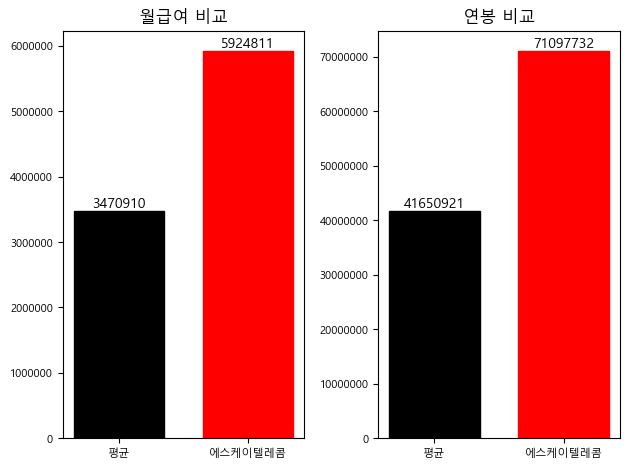

In [86]:
fig, ax = plt.subplots(1, 2)

p1 = ax[0].bar(x=['평균', '에스케이텔레콤'], height=(result.iloc[0, 0], info['월급여추정']), width=0.7)
ax[0].bar_label(p1, fmt='%d')
p1[0].set_color('black')
p1[1].set_color('red')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('월급여 비교')

p2 = ax[1].bar(x=['평균', '에스케이텔레콤'], height=(result.iloc[1, 0], info['연간급여추정']), width=0.7)
p2[0].set_color('black')
p2[1].set_color('red')
ax[1].bar_label(p2, fmt='%d')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('연봉 비교')

ax[0].tick_params(axis='both', which='major', labelsize=8, rotation=0)
ax[0].tick_params(axis='both', which='minor', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=8)
ax[1].tick_params(axis='both', which='minor', labelsize=6)

plt.tight_layout()

In [87]:
# 검증코드
compare_company('현대자동차')

,평균,개수,최소,최대,현대자동차
업종_월급여추정,3791380.2,158.0,530000.0,6159913.6,5930844.9
업종_연간급여추정,45496562.5,158.0,6360000.0,73918963.1,71170138.2


In [88]:
# 검증코드
compare_company('버킷플레이스')

,평균,개수,최소,최대,버킷플레이스
업종_월급여추정,2681550.2,24661.0,390000.0,6170000.0,5046649.9
업종_연간급여추정,32178602.5,24661.0,4680000.0,74040000.0,60559798.3


In [89]:
# 검증코드
compare_company('무신사')

,평균,개수,최소,최대,무신사
업종_월급여추정,3653244.1,5017.0,390000.0,6170000.0,4765273.4
업종_연간급여추정,43838929.3,5017.0,4680000.0,74040000.0,57183281.0
